# BOSTON HOUSING PRICE PREDICTION

## Step 1: Data Collection

The data was collected from attached **housing.csv** file.

## Step 2: Data Preprocessing

In [1]:
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load and read the data
column_names = ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
df=pd.read_csv('housing.csv',header=None,sep='\s+',names=column_names)
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22240\1086273866.py:3: SyntaxWarning: invalid escape sequence '\s'
  df=pd.read_csv('housing.csv',header=None,sep='\s+',names=column_names)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
#Let's learn about the features in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


The dataset consist of 14 columns and 505 records.

#### Handling Missing values

In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No missing values found in the data.

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Statistical Analysis:
* count value of all the features are same, which signifies that their are no missing values in dataset.
* 'CRIM' has mean of 3.61 while max value is 88.97, their is high chance of seeing outliers in this column.
* 'ZN' also has most of its value in 75th quartile range and max value is 100, so it may have a possibility of outliers.
* 'CHAS' has 25th, 50th, 75th Quartile as zero and min value of 0 and max value of 1, which means it is a categorical feature.
* 'NOX' has balanced values, its mean and median have close values.
* 'RM' shows that values arent much deviated form the mean, most of the values are closer to mean, less spread of data is seen.
* 'AGE' has higher spread of values as its range is 97.1 (100-2.90) and standard deviation of 28.148.
* 'DIS' has balanced values as mean and median have close values.
* 'RAD' has its maximum value in 75th quartile which means it cannot have outliers, but the data is not skewed.
* 'TAX' has a major spread of values and it has more distributed values.
* 'PTRATIO' consists of evenly distributed data.
* 'B' has chance of having outliers at the before the Q1 quartile. 
* 'LSTAT' might have outliers beacause of variation in mean and median values.
* 'MEDV' may have outliers as the value in 75th Quartile id far away from the max value of MEDV.

#### Visualising outliers before scaling

<Axes: >

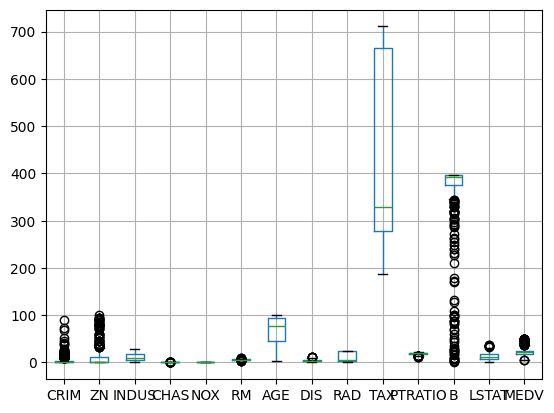

In [6]:
df.boxplot()

##### Observations from Boxplot:
* 'CRIM','ZN','B' seem to have many outliers. We need to handle these outliers. Let's see if scaling of data helps with handling outliers.

#### Let's detect outliers in 'CRIM','B' and 'ZN'

In [7]:
temp=df[['CRIM','ZN','B']]

In [8]:
# detect outliers using boxplot method
outliers = pd.DataFrame()
for column in  ['CRIM','ZN','B']:
    
    Q1 = temp[column].quantile(0.25)
    Q3 = temp[column].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column_outliers = temp[(temp[column] < lower_bound) | (temp[column] > upper_bound)]
    outliers = pd.concat([outliers, column_outliers]) #concate the detected outlier in outlier

In [9]:
print(len(outliers))

211


In [10]:
print(round((len(outliers)/len(df))*100),'% of data as outliers.')

42 % of data as outliers.


Now, we can't remove all these data points because it will lead to loss of data and might affect the prediction. They may contain a valuable information, so we may not remove them.

#### Data Distribution 

**Correlation**

In [11]:
sns.heatmap(df.corr())

<Axes: >

**Density Distribution**

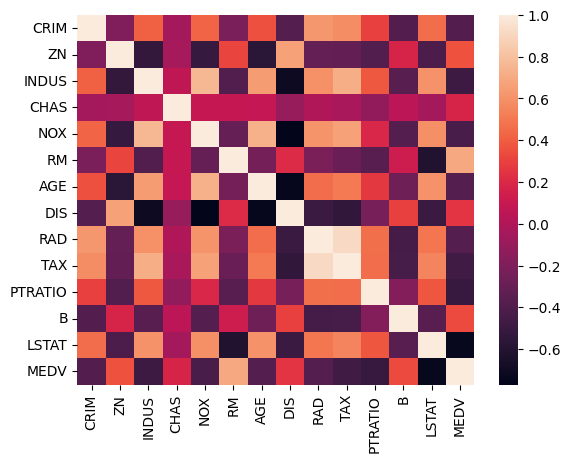

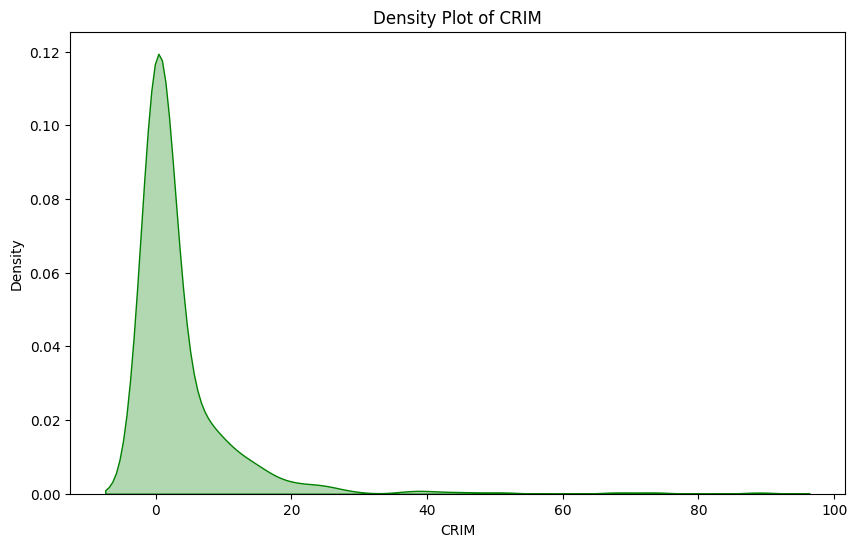

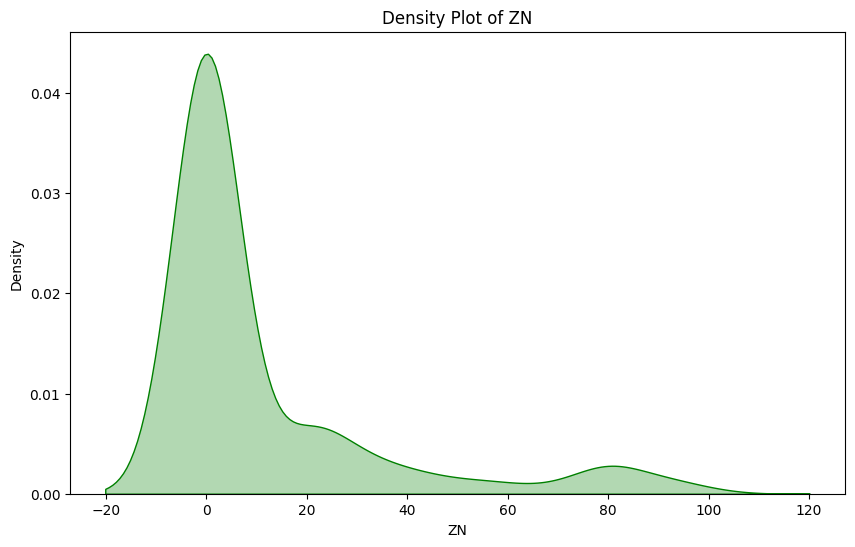

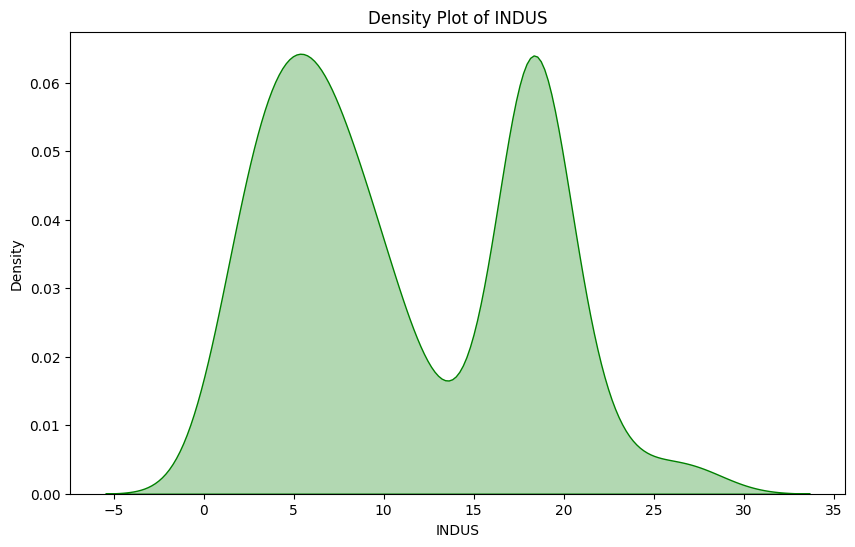

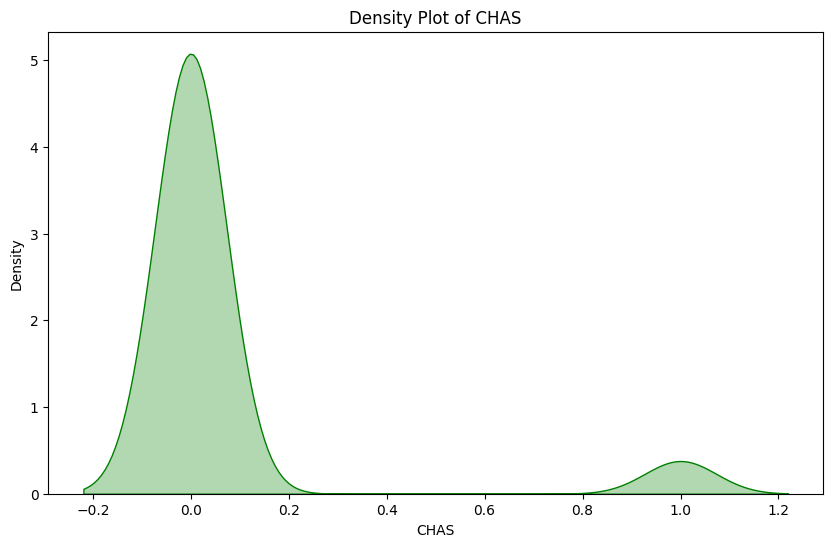

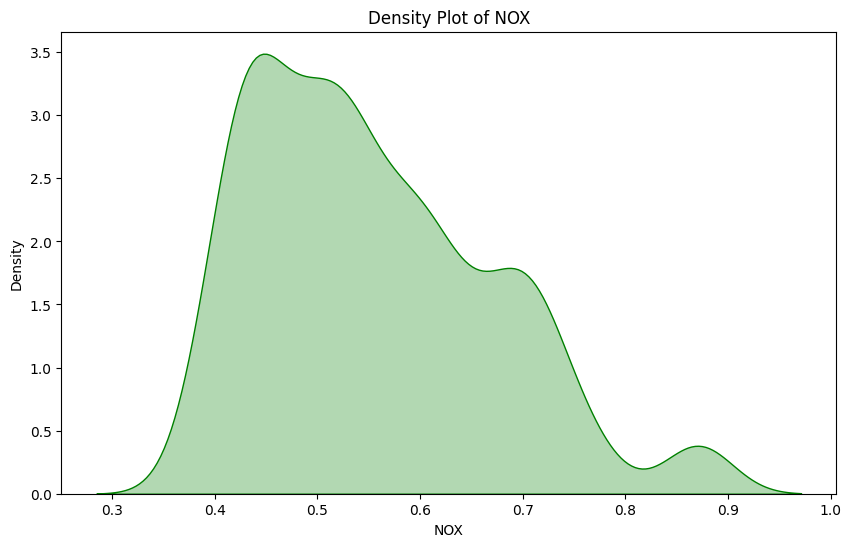

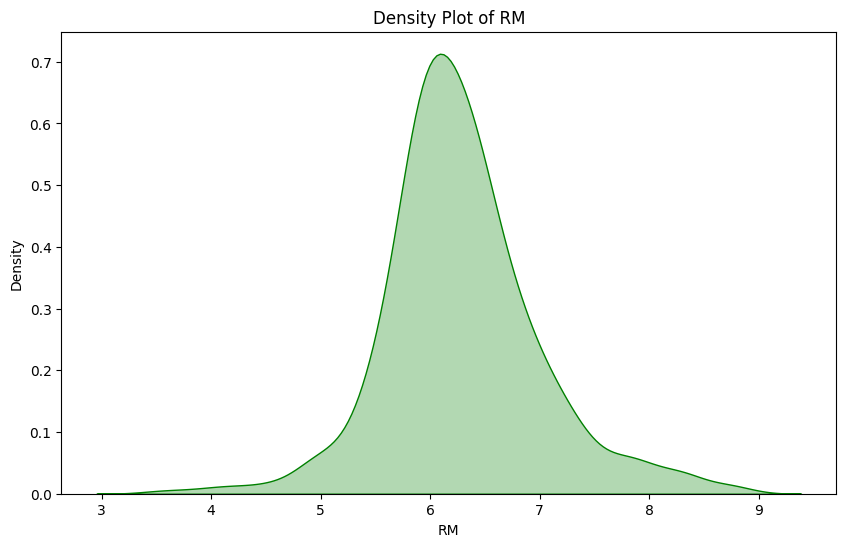

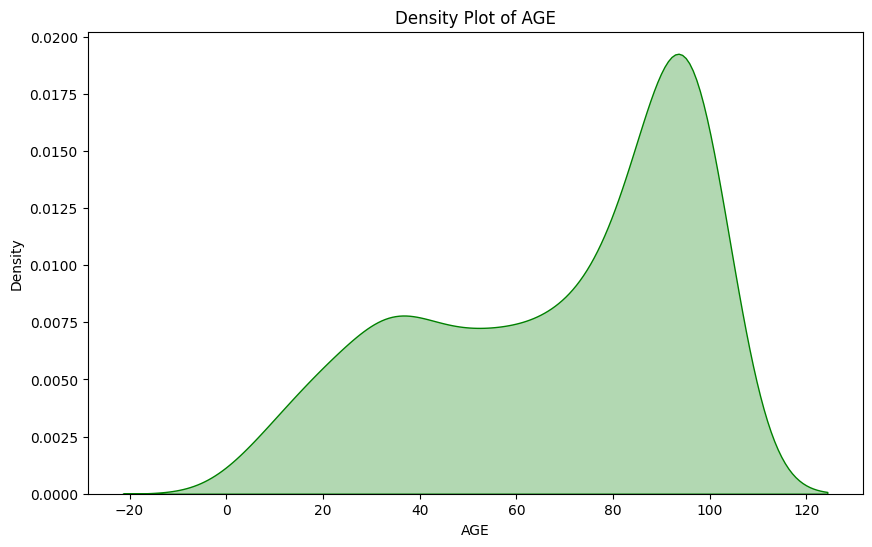

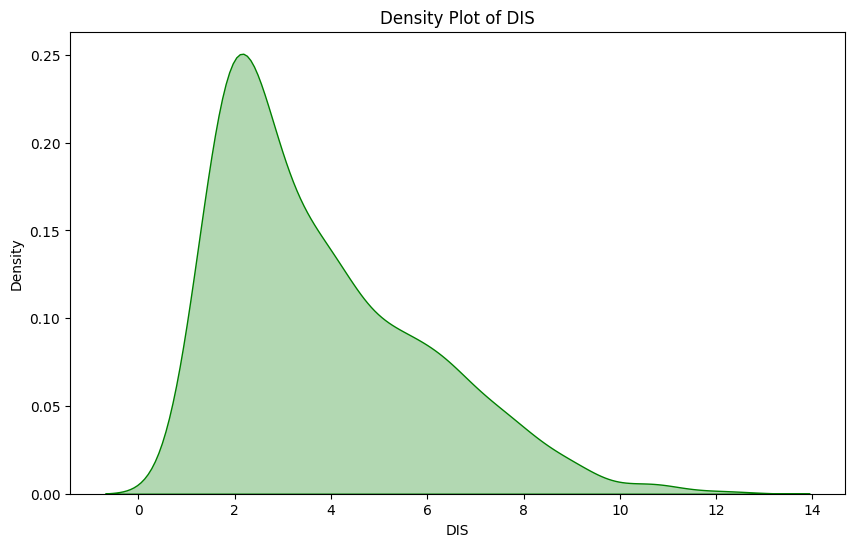

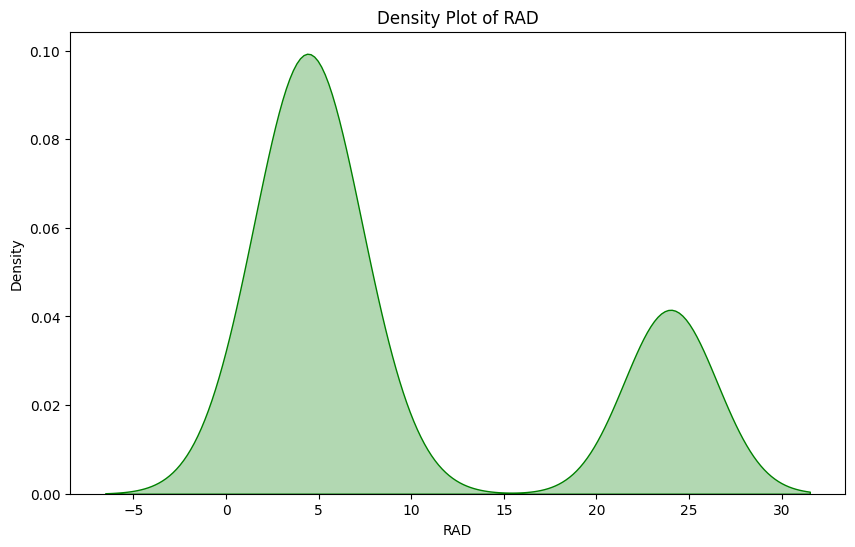

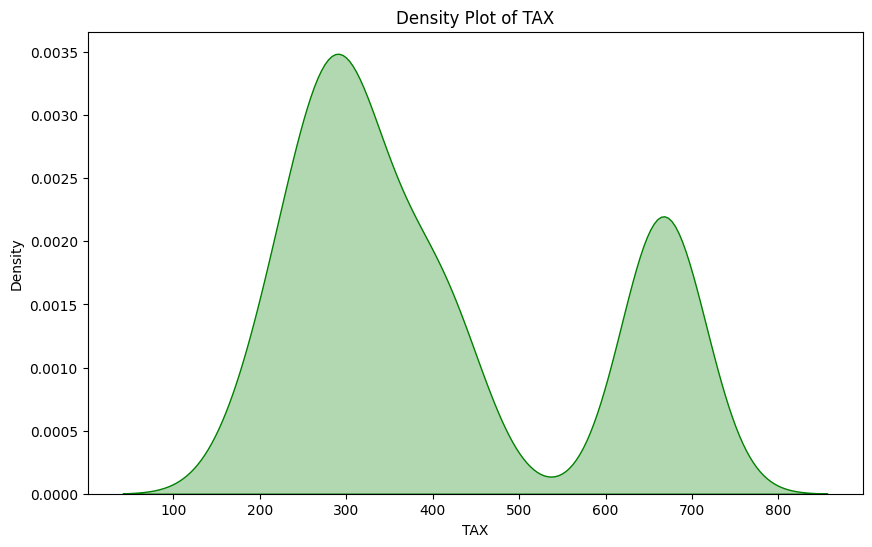

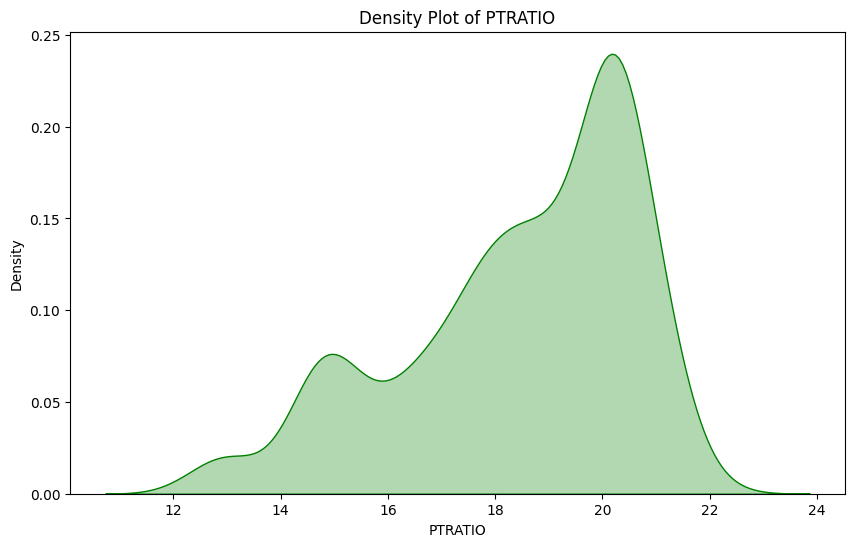

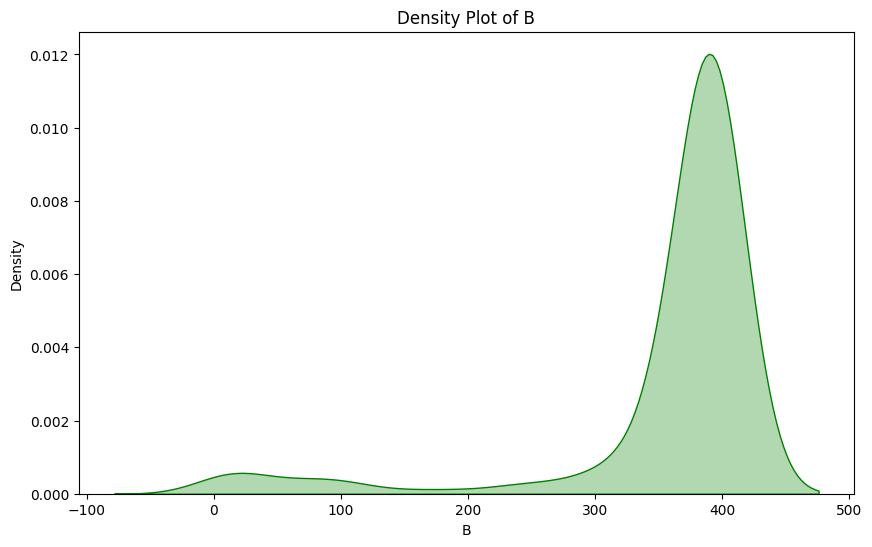

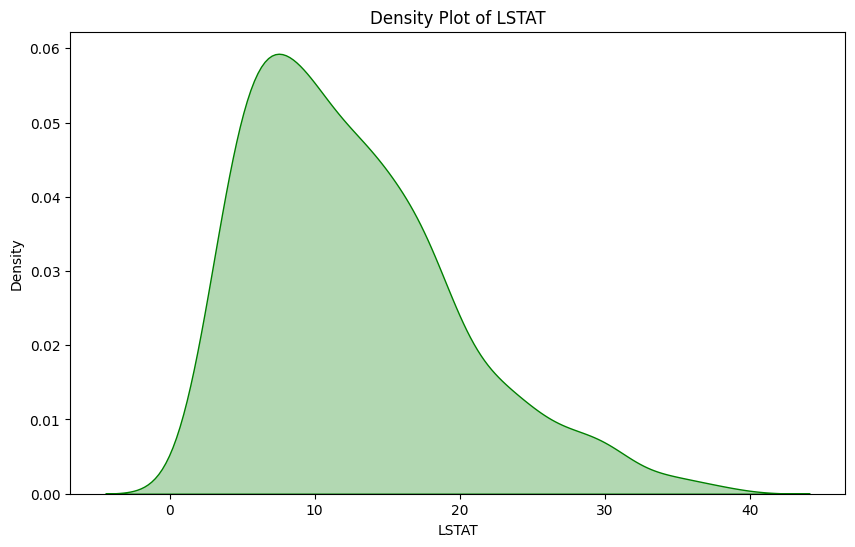

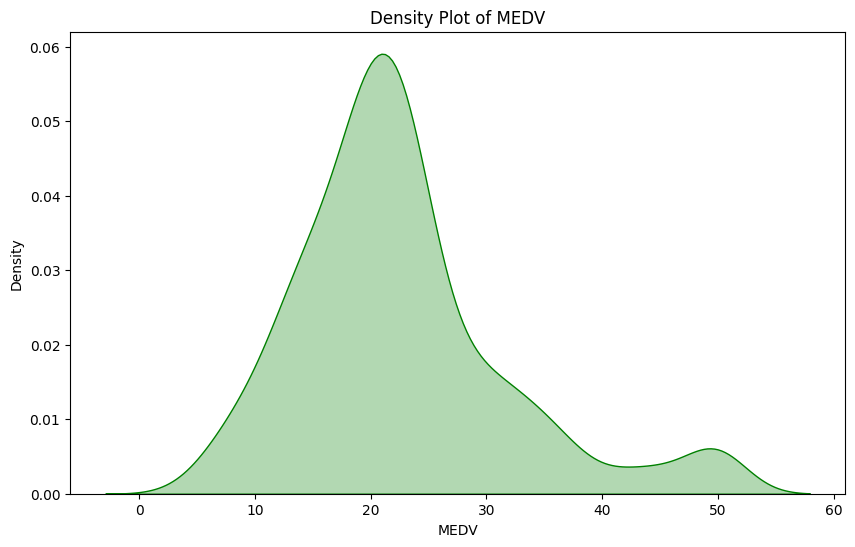

In [12]:
for column in df:
    plt.figure(figsize=(10, 6))
    
    # Plot the KDE (Kernel Density Estimate)
    sns.kdeplot(df[column], color="green", fill=True, alpha=0.3)
    
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Density Plot of {column}')
    
    # Show the plot
    plt.show()

### OBSERVATIONS
* 'CHAS' is categrorical so we will avoid their scaling.
* Also scaling of 'MEDV' is not done as it is a target variable.
* 'MEDV' is highly correlated with 'RM', housing price increases with increase in no. of rooms in estate.
* 'MEDV' is least coorelated with 'LSTAT', housing price decreases with increase in lower status population in the area.
* Also 'RM' and 'LSTAT' are negatively correlated which means the lower status population has less number of room in estate.
* Positively Skewed features: 'CRIM','ZN'
* Negatively Skewed Features: 'B','PTRATIO', 'AGE'

### PERFORMING FEATURE SCALING 

*Standardization is performed on each feature to scale the data.*

In [13]:
df_scaled=df.copy()
df_scaled.head()
numeric_col =['CRIM','ZN','INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT']
for i in numeric_col :
        df_scaled[i]=(df_scaled[i]-df_scaled[i].mean())/(df_scaled[i].std())
        
df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419367,0.284548,-1.286636,0,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,24.0
1,-0.416927,-0.487240,-0.592794,0,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,21.6
2,-0.416929,-0.487240,-0.592794,0,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,34.7
3,-0.416338,-0.487240,-1.305586,0,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,33.4
4,-0.412074,-0.487240,-1.305586,0,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,36.2


### SPLITTING THE DATA

In [14]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('MEDV',axis=1)
Y = df_scaled['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)

In [15]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(404, 13) (102, 13)
(404,) (102,)


## Step 3:  MODEL DEVELOPMENT

#### The model development is done using Linear regression, Decision Tree Regression and ensemble Technique like Random Forest and XGBoost Regression.

### LINEAR REGRESSION

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr = lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

In [17]:
print(Y_pred_lr)

[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597 24.90850512 18.63883645
 -6.08842184 21.75834668 19.23922576 26.19319733 20.64773313  5.79472718
 40.50033966 17.61289074 27.24909479 30.06625441 11.34179277 24.16077616
 17.86058499 15.83609765 22.78148106 14.57704449 22.43626052 19.19631835
 22.43383455 25.21979081 25.93909562 17.70162434 16.76911711 16.95125411
 31.23340153 20.13246729 23.76579011 24.6322925  13.94204955 32.25576301
 42.67251161 17.32745046 27.27618614 16.99310991 14.07009109 25.90341861
 20.29485982 29.95339638 21.28860173 34.34451856 16.04739105 26.22562412
 39.53939798 22.57950697 18.84531367 32.72531661 25.0673037  12.88628956
 22.68221908 30.48287757 31.52626806 15.90148607 20.22094826 16.71089812
 20.52384893 25.96356264 30.61607978 11.59783023 20.51232627 27.48111878
 11.01962332 15.68096344 23.79316251  6.19929359 21.6039073  41.41377225
 18.76548695  8.87931901 20.83076916 13.25620627 20

In [18]:
print(Y_pred_lr.shape)
print(X_test.shape)

(102,)
(102, 13)


In [19]:
#Scale and Intercept:
display(pd.DataFrame(lr.coef_,index=['CRIM','ZN','INDUS','CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT'],columns=['Coefficients']))
display(lr.intercept_)

,Coefficients
CRIM,-0.972456
ZN,0.702250
INDUS,0.277026
CHAS,2.784438
NOX,-1.993401
RM,3.118802
AGE,-0.177235
DIS,-3.048785
RAD,2.285044
TAX,-1.794379


22.292668758837102

In [20]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

r2_score_lr=r2_score(Y_test, Y_pred_lr)
mae_lr=mean_absolute_error(Y_test, Y_pred_lr)
mse_lr=mean_squared_error(Y_test, Y_pred_lr)

print(f'R2 score by Linear Regression is {round(r2_score_lr,2)}.')
print(f'Mean Absolute Error by Linear Regression is {round(mae_lr,2)}.')
print(f'Mean Square Error by Linear Regression is {round(mse_lr,2)}.')


R2 score by Linear Regression is 0.67.
Mean Absolute Error by Linear Regression is 3.19.
Mean Square Error by Linear Regression is 24.29.


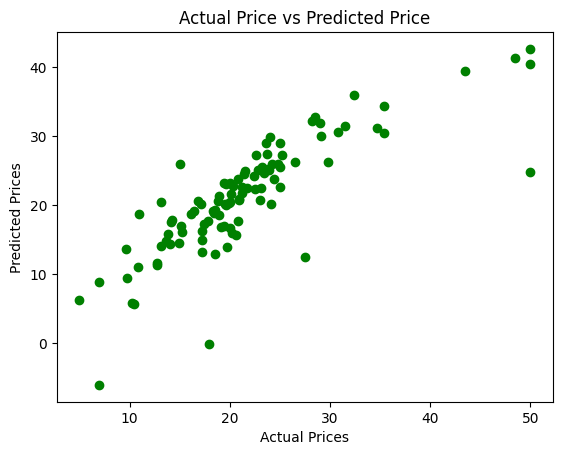

In [21]:
plt.scatter(Y_test,Y_pred_lr, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

* *The scatter plot displays a linear upward trend between actual and predicted values. **The closer the points are to forming a straight line, the higher the accuracy of the prediction.***

## WE WILL USE UNSCALED DATA FOR TREE BASED CLASSIFIERS

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('MEDV',axis=1)
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)

## DECISION TREE REGRESSOR

In [23]:
# from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr=dtr.fit(X_train,Y_train)
Y_pred_dtr=dtr.predict(X_test)
                   

In [24]:
Y_pred_dtr

array([28.1, 33.1, 17.3, 22. , 23.2, 18.5, 16.6, 16.6, 22.7, 22. , 20.5,
       27.1,  8.4, 21.4, 18.5, 23.9, 18.8, 10.5, 46. , 13. , 23.1, 24.4,
       13.6, 22. , 14.5, 11.7, 21. , 13.5, 19.4, 20.7, 18.8, 23.1, 10.4,
       16.2, 13.3, 13.1, 33.4, 18.5, 20.4, 24.8, 19.8, 28.4, 46. , 19.3,
       22. , 13. , 14.9, 24.1, 17.7, 32. , 21.7, 36.1, 16.7, 28.4, 43.1,
       18.5, 15.2, 22.8, 22. , 22.5, 24.5, 33. , 29.4, 19.3, 26.6, 14.4,
       13. , 22.9, 22.8, 14.1, 21.8, 28.7,  8.3, 18.6, 21.5, 10.5, 19.8,
       50. , 13.3,  8.1, 21.2, 16.3, 19.4, 10.5, 14.5, 29.9, 14.8, 23.1,
       22.9, 18. , 23.3,  8.8, 19.2, 17.6, 16.2, 19.3, 50. , 16.3, 11.7,
       16.3, 19. , 26.4])

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

r2_score_dtr=r2_score(Y_test, Y_pred_dtr)
mae_dtr=mean_absolute_error(Y_test, Y_pred_dtr)
mse_dtr=mean_squared_error(Y_test, Y_pred_dtr)


print(f'R2 score by Decision Tree Regression is {round(r2_score_dtr,2)}.')
print(f'Mean Absolute Error by Decision Tree Regression is {round(mae_dtr,2)}.')
print(f'Mean Square Error by Decision Tree Regression is {round(mse_dtr,2)}.')

R2 score by Decision Tree Regression is 0.86.
Mean Absolute Error by Decision Tree Regression is 2.39.
Mean Square Error by Decision Tree Regression is 10.42.


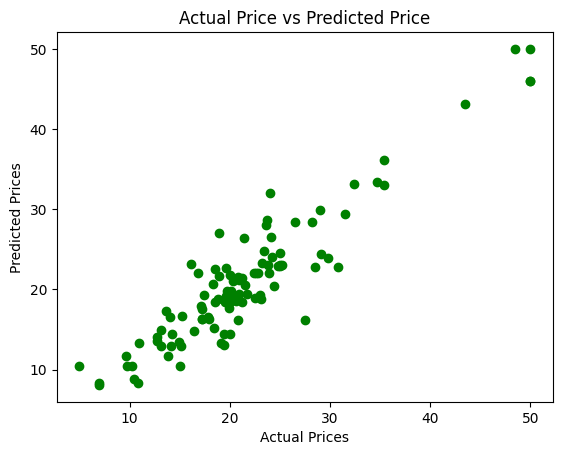

In [26]:
plt.scatter(Y_test,Y_pred_dtr, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

* *The scatter plot displays a linear trend between actual and predicted values. **The closer the points are to forming a straight line, the higher the accuracy of the prediction.***

## RANDOM FOREST REGRESSOR

In [27]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3)
rfr=rfr.fit(X_train,Y_train)
Y_pred_rfr=rfr.predict(X_test)

In [28]:
Y_pred_rfr

array([22.33955084, 28.32982825, 16.51920285, 23.69046825, 15.73404331,
       21.97011117, 17.58426922, 15.8502909 , 21.896515  , 21.71729003,
       17.58426922, 17.58426922, 11.57451216, 21.97011117, 21.93875951,
       27.1138959 , 17.23875941, 11.70429372, 43.69101348, 13.49185207,
       23.34913859, 23.22240383, 16.39860715, 23.4186275 , 14.07926921,
       14.74485811, 22.30819918, 13.5145904 , 17.58426922, 21.93875951,
       18.71131845, 23.22240383, 30.11282492, 21.68994942, 15.98868863,
       16.11134056, 34.46752143, 22.00050639, 18.65261108, 23.07926265,
       16.7504679 , 27.06059369, 43.93466149, 21.93875951, 22.66717087,
       13.47629939, 17.19370679, 23.22240383, 16.88493152, 25.98710025,
       21.93875951, 30.81778815, 17.19370679, 25.01280202, 45.60427221,
       21.896515  , 15.17874853, 29.36523261, 22.21548917, 17.58426922,
       24.5215408 , 32.88503259, 28.2338753 , 21.86516335, 25.23632236,
       16.83234739, 13.1871486 , 23.22240383, 26.47271786, 15.60

In [29]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

r2_score_rfr=r2_score(Y_test, Y_pred_rfr)
mae_rfr=mean_absolute_error(Y_test, Y_pred_rfr)
mse_rfr=mean_squared_error(Y_test, Y_pred_rfr)

print(f'R2 score by Random Forest Regression is {round(r2_score_rfr,2)}.')
print(f'Mean Absolute Error by Random Forest Regression is {round(mae_rfr,2)}.')
print(f'Mean Square Error by Random Forest Regression is {round(mse_rfr,2)}.')

R2 score by Random Forest Regression is 0.81.
Mean Absolute Error by Random Forest Regression is 2.69.
Mean Square Error by Random Forest Regression is 13.91.


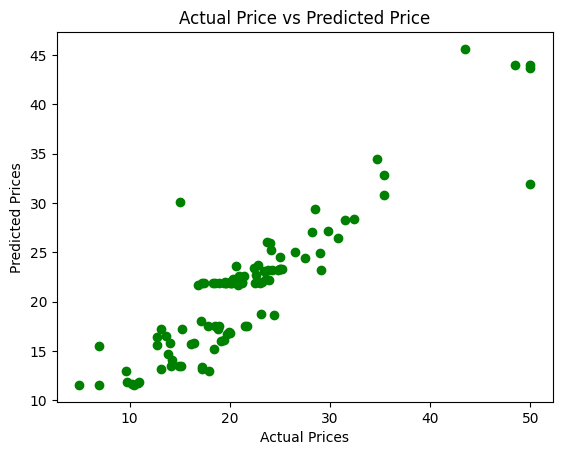

In [30]:
plt.scatter(Y_test,Y_pred_rfr, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

* *The scatter plot displays a slight linear trend between actual and predicted values. **The closer the points are to forming a straight line, the higher the accuracy of the prediction.***

## XGBOOST REGRESSION

In [31]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb=xgb.fit(X_train, Y_train)
Y_pred_xgb=xgb.predict(X_test)

In [32]:
Y_pred_xgb

array([24.276764 , 30.46075  , 17.959005 , 22.965069 , 17.133715 ,
       22.163433 , 18.669397 , 15.236069 , 21.046127 , 20.459925 ,
       22.439089 , 18.89959  , 11.203732 , 21.811333 , 18.655327 ,
       26.25912  , 21.139784 ,  9.210471 , 47.378334 , 15.913627 ,
       25.087412 , 26.079153 , 13.452615 , 21.082066 , 15.193554 ,
       15.992098 , 20.690847 , 13.094459 , 21.131876 , 21.168287 ,
       18.848736 , 23.033901 , 14.877705 , 21.35931  , 15.263533 ,
       14.96528  , 33.754707 , 19.01804  , 22.69863  , 24.285683 ,
       19.455326 , 27.735622 , 47.043087 , 19.217285 , 21.663893 ,
       14.770664 , 13.908811 , 23.762539 , 17.538256 , 25.872328 ,
       22.392021 , 35.081337 , 17.318087 , 27.144457 , 45.176407 ,
       21.917618 , 16.05219  , 30.757784 , 22.377308 , 19.42954  ,
       25.34448  , 34.943123 , 30.451046 , 17.93282  , 25.573687 ,
       17.035986 , 14.910609 , 22.595358 , 27.416218 , 14.8786125,
       20.446955 , 30.664629 ,  9.616146 , 21.455444 , 22.9409

In [33]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

r2_score_xgb=r2_score(Y_test, Y_pred_xgb)
mae_xgb=mean_absolute_error(Y_test, Y_pred_xgb)
mse_xgb=mean_squared_error(Y_test, Y_pred_xgb)



print(f'R2 score by XGBoost Regression is {round(r2_score_xgb,2)}.')
print(f'Mean Absolute Error by XGBoost Regression is {round(mae_xgb,2)}.')
print(f'Mean Square Error by XGBoost Regression is {round(mse_xgb,2)}.')

R2 score by XGBoost Regression is 0.91.
Mean Absolute Error by XGBoost Regression is 1.89.
Mean Square Error by XGBoost Regression is 6.91.


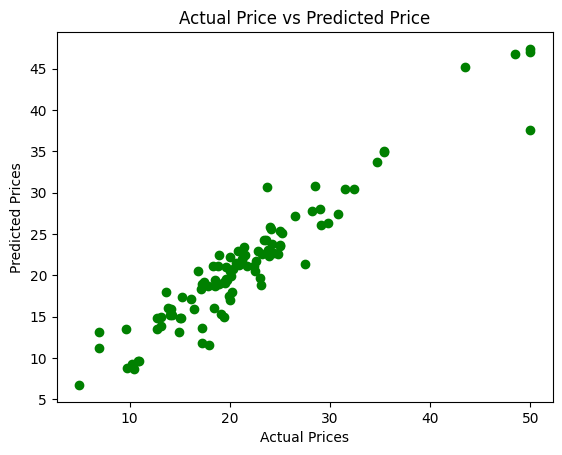

In [34]:
plt.scatter(Y_test,Y_pred_xgb, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

* *The scatter plot displays a linear trend between actual and predicted values. **The closer the points are to forming a straight line, the higher the accuracy of the prediction.***

## Step 4: MODEL EVALUATION

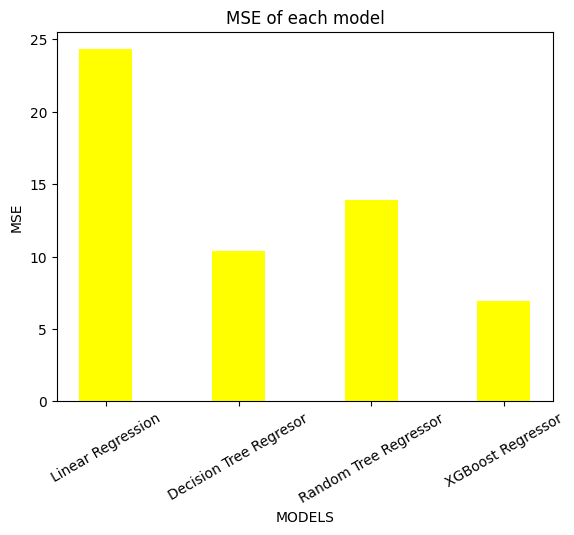

In [35]:
## COMPARING MEAN SQUARED ERROR OF EACH MODEL
models=['Linear Regression','Decision Tree Regresor','Random Tree Regressor', 'XGBoost Regressor']
values=[mse_lr,mse_dtr,mse_rfr,mse_xgb]
plt.bar(models, values, color ='yellow', 
        width = 0.4)
plt.xticks(rotation=30)
plt.xlabel("MODELS")
plt.ylabel("MSE")
plt.title("MSE of each model")
plt.show()

The model with least mean squarred error performs best with test data and gives more accurate prediction. From above bar graph, we can observe that XGBoost is the best performing model.

In [36]:
#Predicted House Price
predicted_MEDV=pd.DataFrame(Y_pred_xgb,columns=['Predicted_MEDV'])
predicted_MEDV

,Predicted_MEDV
0,24.276764
1,30.460751
2,17.959005
3,22.965069
4,17.133715
...,...
97,11.571929
98,13.430772
99,13.622202
100,20.457579
